In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000
ALPHA0 = BETA = 68921.0
K = 48
M = 2**31
EPS = 0.05

1. Мультипликативный конгруэнтный метод

In [2]:
def MCM(alpha_t, beta, M):
    while True:
        alpha_t = (alpha_t * beta) % M
        yield alpha_t / M

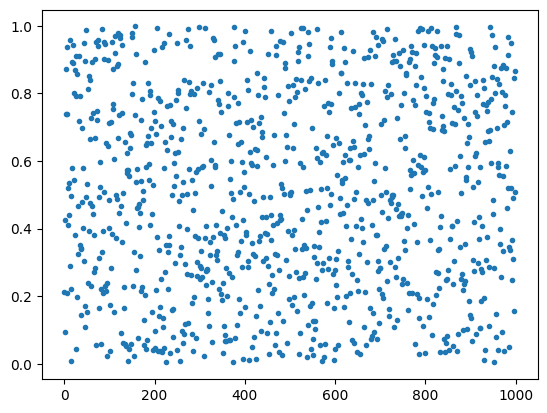

In [3]:
mcm_gen = MCM(ALPHA0, BETA, M)
plt.plot([i for i in range(N)], [next(mcm_gen) for _ in range(N)], '.')

2. Метод Макларена-Марсальи

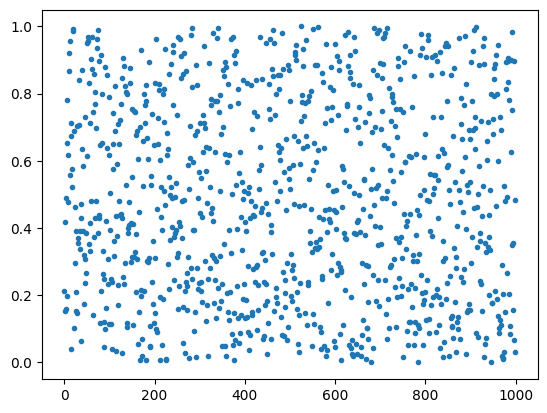

In [4]:
mсm_gen2 = MCM(ALPHA0 + 3, BETA + 1, M - 1)
plt.plot([i for i in range(N)], [next(mсm_gen2) for i in range(N)],'.')

In [5]:
import math

def MM(gen1, gen2):
    values = [next(gen1) for _ in range(N)]
    value = 0
    while True:
        s = math.floor(next(gen2) * K)
        value = values[s]
        values[s] = next(gen1)
        yield value


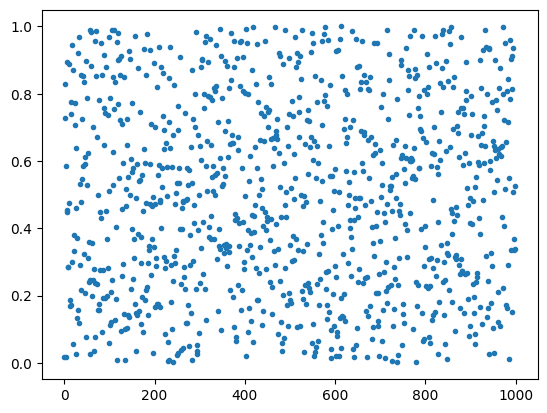

In [6]:
mm_gen = MM(mcm_gen, mсm_gen2)
plt.plot([i for i in range(N)], [next(mm_gen) for _ in range(N)], '.')

3. Критерий Колмогорова

In [7]:
from scipy import stats


def kolmogorov_criterion(gen, number_of_samples = N):
    return stats.kstest([next(gen) for _ in range(number_of_samples)], 'uniform')

print(f'Multiplicative congruent method: {kolmogorov_criterion(mcm_gen)}')
print(f'McLaren-Marsaglia method: {kolmogorov_criterion(mm_gen)}')

Multiplicative congruent method: KstestResult(statistic=0.024141555260866893, pvalue=0.5959242851242297, statistic_location=0.14585844473913312, statistic_sign=1)
McLaren-Marsaglia method: KstestResult(statistic=0.03369488661363723, pvalue=0.20167390541945118, statistic_location=0.3206948866136372, statistic_sign=-1)


3. Критерий хи-квадрат

In [8]:
def chisquare_criterion(gen, number_of_bins = 10):
    bin_counts = [0] * number_of_bins
    bin_width = 1. / number_of_bins

    for _ in range(N):
        bin_number = int(next(gen) // bin_width)
        bin_counts[bin_number] += 1

    return stats.chisquare(bin_counts)

print(f'Multiplicative congruent method: {chisquare_criterion(mcm_gen)}')
print(f'McLaren-Marsaglia method: {chisquare_criterion(mm_gen)}')

Multiplicative congruent method: Power_divergenceResult(statistic=6.119999999999999, pvalue=0.7278506992125442)
McLaren-Marsaglia method: Power_divergenceResult(statistic=4.56, pvalue=0.8708559358415972)
